In [1]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import linear_model
from word2number import w2n

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
hp = pd.read_csv("/Users/kishore/Documents/Kishore/Bloomington/Data Science/Machinelearning practice/py-master/ML/2_linear_reg_multivariate/homeprices.csv")

In [5]:
hp

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


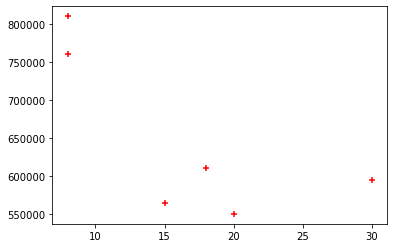

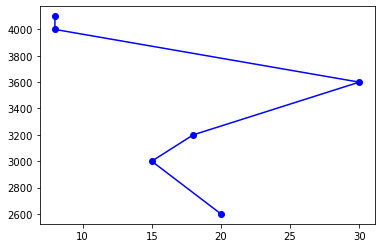

In [6]:
plt.scatter(hp.age, hp.price, color = 'red', marker = '+')
plt.show()
plt.plot(hp.age, hp.area, color = 'blue', marker = 'o')

In [7]:
import math
median_bedrooms = math.floor(hp.bedrooms.median()) # floor gives number largest or less than the given number
median_bedrooms

4

In [8]:
hp.bedrooms = hp.bedrooms.fillna(median_bedrooms)

In [9]:
hp

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


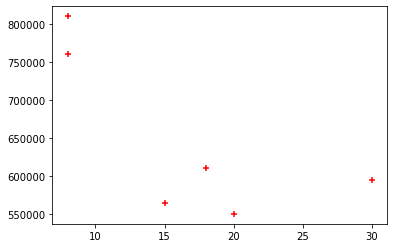

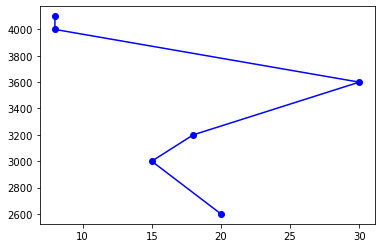

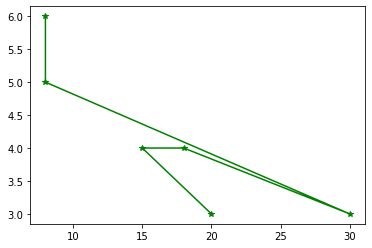

In [10]:
plt.scatter(hp.age, hp.price, color = 'red', marker = '+')
plt.show()
plt.plot(hp.age, hp.area, color = 'blue', marker = 'o')
plt.show()
plt.plot(hp.age, hp.bedrooms, color = 'green', marker = '*')

In [11]:
reg = linear_model.LinearRegression()
reg.fit(hp[['area','bedrooms','age']], hp['price'])

LinearRegression()

In [12]:
reg.intercept_

221323.00186540425

In [13]:
reg.coef_ # slopes (area, bedrooms, age)

array([  112.06244194, 23388.88007794, -3231.71790863])

In [14]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [15]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

### Exercise

In [16]:
hire = pd.read_csv("/Users/kishore/Documents/Kishore/Bloomington/Data Science/Machinelearning practice/py-master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")

In [17]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
hire['experience'] = hire['experience'].fillna("zero")

In [19]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
# Apply word to number
hire['experience'] = hire['experience'].apply(w2n.word_to_num)

In [21]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [22]:
import math
median_test_score = math.floor(hire['test_score(out of 10)'].median())

In [23]:
median_test_score

8

In [24]:
hire['test_score(out of 10)'] = hire['test_score(out of 10)'].fillna(median_test_score)

In [25]:
hire

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [26]:
regr = linear_model.LinearRegression()
regr.fit(hire[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], hire['salary($)'])

LinearRegression()

In [27]:
regr.intercept_

17737.26346433768

In [28]:
regr.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [29]:
regr.predict([[2,9,6]])

array([53205.96797671])

In [30]:
regr.predict([[12,10,10]])

array([92002.18340611])